In [ ]:
from textblob import TextBlob
import tweepy
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login (1).csv


In [ ]:
#Get the Data
log =  pd.read_csv(' login (1).csv')

In [ ]:
#Twitter API credentials
consumerKey = "FRSFDQUqAYJ6UY8kDmCImtGR9"
consumerSecret = "Bbr99WB8I52jeiPzWeDfZvt3225ql8dhICdQqy8MoBoQIy4k1L"
accessToken = "1517076893106724864-aVOcrHImQIVhsLMK8ydJmWp7DrpbWT"
accessTokenSecret = "pSicKyRtgq6AbtAuStN8FwmAngV2FmAkR3fUzANML1vkD"

In [ ]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create and API object while passing the authentication information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [ ]:
#Extract 100 tweets on Donald Trump
posts = api.user_timeline(screen_name = "BarackObama", count = 100, lang = "en" , tweet_mode = "extended")

#print the last 5 tweets from the account
print("Recent tweets from the account: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' +  tweet.full_text  + '\n')
  i = i+1

Recent tweets from the account: 

1) I wanted to share some of what I've read that offers useful context, solutions we can learn from, and interesting perspectives. Check it out, and then tune in to the speech on Thursday at 12:15pm PT. https://t.co/gjOgVuqIwF

2) I've been reading up on this issue, sitting down with academics, researchers, industry leaders and former regulators, and listening to young leaders who are working to make progress.

3) Tomorrow, I'm heading to Stanford to deliver a speech about changes in the way we create and consume information, and the very real threat it poses to democracy.

4) Through the @ObamaFoundation, we’re working to empower and equip emerging leaders to tackle issues like the spread of disinformation. https://t.co/e5T9rq4JUN

5) Part of the reason it’s hard to bring about change is because we live in a media environment that elevates falsehoods as much as truths, and divides people as much as it brings them together.



In [ ]:
#create a dataframe with the column Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns = ["Tweets"])

#Show the first five rows
df.head()

,Tweets
0,I wanted to share some of what I've read that ...
1,"I've been reading up on this issue, sitting do..."
2,"Tomorrow, I'm heading to Stanford to deliver a..."
3,"Through the @ObamaFoundation, we’re working to..."
4,Part of the reason it’s hard to bring about ch...


In [ ]:
#clean the text
#Create a function to clean the text

def cleanTxt(text):
  text = re.sub( "[^A-Za-z0-9]", " ", text)
  text = re.sub( "#", " ", text )
  text = re.sub( "RT[\s]+ " , " " , text)
  #text = re.sub( "^httlps? : \/\/\S+" , " " , text)
  text = re.sub(r'https?:\/\/\+S*', '', text, flags=re.MULTILINE)
  text = re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "", text)

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Display the cleaned Text
df




,Tweets,Subjectivity,Polarity,Analysis
0,I wanted to share some of what I ve read that ...,0.166667,0.300000,Positive
1,I ve been reading up on this issue sitting do...,0.229630,-0.018519,Negative
2,Tomorrow I m heading to Stanford to deliver a...,0.390000,0.260000,Positive
3,Through the ObamaFoundation we re working to...,0.000000,0.000000,Neutral
4,Part of the reason it s hard to bring about ch...,0.360417,0.061174,Positive
...,...,...,...,...
95,In his inaugural address one year ago today ...,0.658333,0.191667,Positive
96,When Michelle and I launched the ObamaFoundat...,0.330556,0.179167,Positive
97,Thanks to the life saving work by scientists a...,0.200000,0.175000,Positive
98,Congrats to our newest cohort of ObamaFoundat...,0.675000,0.450000,Positive


In [ ]:
#Create a function to get subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Adding two new columns to the dataframe
df[ ' Subjectivity ' ] = df[ 'Tweets' ].apply(getSubjectivity)
df[ 'Polarity' ] = df[ 'Tweets' ].apply(getPolarity)

#Display the new dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I wanted to share some of what I ve read that ...,0.166667,0.300000,Positive
1,I ve been reading up on this issue sitting do...,0.229630,-0.018519,Negative
2,Tomorrow I m heading to Stanford to deliver a...,0.390000,0.260000,Positive
3,Through the ObamaFoundation we re working to...,0.000000,0.000000,Neutral
4,Part of the reason it s hard to bring about ch...,0.360417,0.061174,Positive
...,...,...,...,...
95,In his inaugural address one year ago today ...,0.658333,0.191667,Positive
96,When Michelle and I launched the ObamaFoundat...,0.330556,0.179167,Positive
97,Thanks to the life saving work by scientists a...,0.200000,0.175000,Positive
98,Congrats to our newest cohort of ObamaFoundat...,0.675000,0.450000,Positive


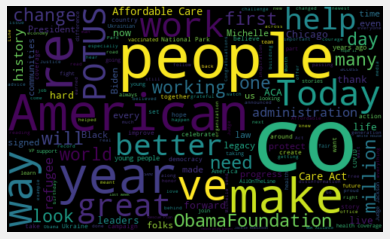

In [ ]:
#Plot the word cloud
allWords = ' '.join( [ twts for twts in df[ 'Tweets' ]])
wordCloud = WordCloud( width = 500, height = 300, random_state= 21, max_font_size = 119 ).generate(allWords)

plt.imshow(wordCloud, interpolation =  "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

df[ 'Analysis' ] = df[ 'Polarity' ].apply(getAnalysis)

#Show dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I wanted to share some of what I ve read that ...,0.166667,0.300000,Positive
1,I ve been reading up on this issue sitting do...,0.229630,-0.018519,Negative
2,Tomorrow I m heading to Stanford to deliver a...,0.390000,0.260000,Positive
3,Through the ObamaFoundation we re working to...,0.000000,0.000000,Neutral
4,Part of the reason it s hard to bring about ch...,0.360417,0.061174,Positive
...,...,...,...,...
95,In his inaugural address one year ago today ...,0.658333,0.191667,Positive
96,When Michelle and I launched the ObamaFoundat...,0.330556,0.179167,Positive
97,Thanks to the life saving work by scientists a...,0.200000,0.175000,Positive
98,Congrats to our newest cohort of ObamaFoundat...,0.675000,0.450000,Positive


In [ ]:
#Print all of the positive tweets
j = 1
sortedDF = df.sort_values( by=[ 'Polarity' ] )
for i in range(0, sortedDF.shape[0]):
  if( sortedDF[ 'Analysis' ] [ i ] == 'Positive' ):
    print(str(j)  + ' )  ' + sortedDF [ 'Tweets' ][ i ])
    print()
    j = j + 1




1 )  I wanted to share some of what I ve read that offers useful context  solutions we can learn from  and interesting perspectives  Check it out  and then tune in to the speech on Thursday at 12 15pm PT     t co gjOgVuqIwF

2 )  Tomorrow  I m heading to Stanford to deliver a speech about changes in the way we create and consume information  and the very real threat it poses to democracy 

3 )  Part of the reason it s hard to bring about change is because we live in a media environment that elevates falsehoods as much as truths  and divides people as much as it brings them together 

4 )  In recent years  we ve seen how quickly disinformation spreads  especially on social media  This has created real challenges for our democracy 

5 )  The Asia Pacific region plays an important role in my own story  It s also home to a generation of young people working to create a better world for us all  I m looking forward to getting to know our newest cohort of  ObamaFoundation leaders     t co vll

In [ ]:
#printing negative tweets
j = 1
sortedDF = df.sort_values( by = 'Polarity', ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][ i ] == 'Negative'):
    print( str(j) + ') '  + sortedDF[ 'Tweets' ][ i ])
    print()
    j = j + 1


1) I ve been reading up on this issue  sitting down with academics  researchers  industry leaders and former regulators  and listening to young leaders who are working to make progress 

2) 75 years ago  Jackie Robinson competed in his first MLB game despite facing vicious treatment and threats  Throughout his life  Jackie used his voice to stand up for racial justice and in the process  changed America for the better 

3) No trip to Chicago is complete without a  ChicagoBulls game   and this time I brought along some of the young people who are part of our  MBK Alliance and  GirlsAlliance     t co LjZmleio5o

4) Passing the ACA was incredibly difficult  People who had coverage were worried about losing it  the media was skeptical  misinformation was flying around  and Republicans showed no interest in working with us  But Joe  Harry Reid  Nancy Pelosi and I were determined 

5) And third  a reminder that in the face of brutal repression  there are ordinary Russians that are showing tr

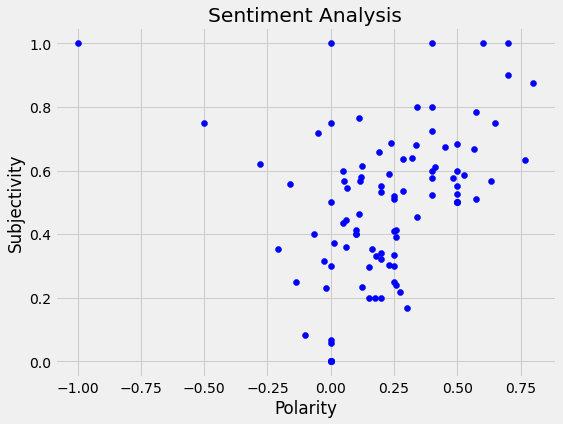

In [ ]:
#Plotting the polarity and subjectivity
plt.figure( figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter( df[ 'Polarity' ][ i ] , df[' Subjectivity '][ i ] , color='Blue'  )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Getting the percdntage of positive tweets
ptweets = df[ df['Analysis'] == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1 )


76.0

In [ ]:
#Getting the percentage of negative tweets
ntweets = df[df['Analysis'] == 'Negative' ]
ntweets = ntweets['Tweets']
round( (ntweets.shape[0] / df.shape[0] ) * 100, 1)

11.0

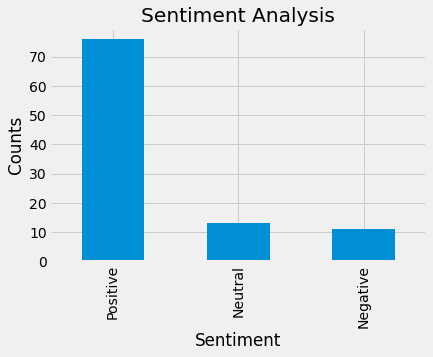

In [ ]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and visualize value counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
